In [1]:
pip install pyspark

In [2]:
from pyspark import SparkConf,SparkContext
import collections

In [3]:
conf=SparkConf().setMaster("local").setAppName("WordCount")
sc=SparkContext(conf=conf)

In [4]:
import re
def normalizedWord(text):
    return re.compile(r'\W+',re.UNICODE).split(text.lower())

In [5]:
input=sc.textFile("2018_YDS_Exams.txt")
words=input.flatMap(normalizedWord)
wordsCount=words.countByValue()

In [6]:
import pandas as pd
name=[]
counts=[]
df=pd.DataFrame()
for word,count in wordsCount.items():
    cleanWord=word.encode("ascii","ignore")
    if(cleanWord):
        name.append(cleanWord.decode())
        counts.append(str(count))

df["Name"]=name
df["Counts"]=counts
df["Counts"]=df["Counts"].astype(int)
df.sort_values(by="Counts",ascending=False).head(10)

,Name,Counts
26,the,1352
5,of,795
55,to,720
13,a,713
20,and,495
186,in,472
22,that,302
96,d,277
12,is,274
94,b,268


In [7]:
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    STOPWORDS.add("spring")
    STOPWORDS.add("test")
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200,stopwords=STOPWORDS).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

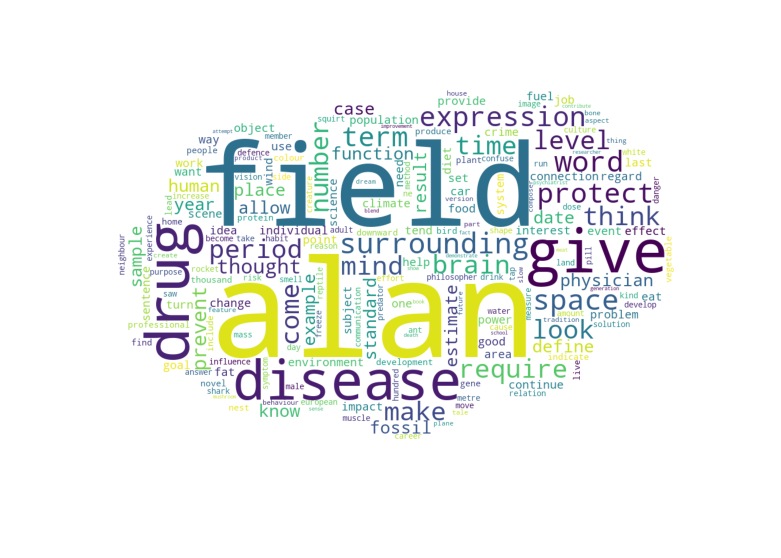

In [15]:
wc(df["Name"],"white")